In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load the dataset

In [3]:
dataset = pd.read_csv(r"C:\Users\bhumu\Downloads\nlp_project_dataset\train.csv")

In [4]:
dataset

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [5]:
dataset.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

We do skip location as it has many null values and train the model with only text with target. 

In [6]:
df = dataset[['text','target']]

In [7]:
df

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...
7608,Two giant cranes holding a bridge collapse int...,1
7609,@aria_ahrary @TheTawniest The out of control w...,1
7610,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,Police investigating after an e-bike collided ...,1


# <font size = 3> Text pre-processing

In [9]:
def text_preprocessing(dframe_text):
    
    text_corpus = []
    
    for i in range(len(dframe_text)):
        twt = re.sub('[^a-zA-Z]', ' ', dframe_text[i])
        twt = twt.lower()
        twt = twt.split()
        ps = PorterStemmer()
        twt = [ps.stem(word) for word in twt if not word in set(stopwords.words('english'))]
        twt = ' '.join(twt)
        text_corpus.append(twt)
    
    return text_corpus

In [11]:
import re
import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

corpus = text_preprocessing(df['text'])

'''
corpus = []
for i in range(0, len(df)):
    tweet = re.sub('[^a-zA-Z]', ' ', df['text'][i])
    tweet = tweet.lower()
    tweet = tweet.split()
    ps = PorterStemmer()
    tweet = [ps.stem(word) for word in tweet if not word in set(stopwords.words('english'))]
    tweet = ' '.join(tweet)
    corpus.append(tweet)

print(corpus)
'''

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bhumu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


"\ncorpus = []\nfor i in range(0, len(df)):\n    tweet = re.sub('[^a-zA-Z]', ' ', df['text'][i])\n    tweet = tweet.lower()\n    tweet = tweet.split()\n    ps = PorterStemmer()\n    tweet = [ps.stem(word) for word in tweet if not word in set(stopwords.words('english'))]\n    tweet = ' '.join(tweet)\n    corpus.append(tweet)\n\nprint(corpus)\n"

# <font size = 3> Tokenization of text

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer() # term-frequency 
X = tfidf.fit_transform(corpus).toarray()
y = df['target']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# <font size = 3> Naive Bayes Classification

In [25]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

y_pred = nb_model.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[411 475]
 [141 496]]


0.5955351280367696

# <font size = 3> Random Forest Classification

In [26]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[822  64]
 [252 385]]


0.7925147734734077

# <font size = 3> Preditions of test data

In [28]:
df2 = pd.read_csv(r"C:\Users\bhumu\Downloads\nlp_project_dataset\test.csv")

In [29]:
df2

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


In [30]:
# we do skip keyword, location as we didn't train model with these features
test_df = df2[['id','text']]

test_df

,id,text
0,0,Just happened a terrible car crash
1,2,"Heard about #earthquake is different cities, s..."
2,3,"there is a forest fire at spot pond, geese are..."
3,9,Apocalypse lighting. #Spokane #wildfires
4,11,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...
3258,10861,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,Storm in RI worse than last hurricane. My city...
3260,10868,Green Line derailment in Chicago http://t.co/U...
3261,10874,MEG issues Hazardous Weather Outlook (HWO) htt...


In [32]:
corpus1 = text_preprocessing(test_df['text'])

In [31]:
# text pre-processing
'''
corpus1 = []
for i in range(0, 3263):
    tweet = re.sub('[^a-zA-Z]', ' ', test_df['text'][i])
    tweet = tweet.lower()
    tweet = tweet.split()
    ps = PorterStemmer()
    tweet = [ps.stem(word) for word in tweet if not word in set(stopwords.words('english'))]
    tweet = ' '.join(tweet)
    corpus1.append(tweet)
'''

In [33]:
X_1 = tfidf.transform(corpus1)

y_pred_1 = rfc.predict(X_1)

y_pred_1

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

In [34]:
final_sub = pd.DataFrame({'id':test_df['id'], 'target':y_pred_1})

final_sub.to_csv(r"C:\Users\bhumu\Downloads\nlp_project_dataset\third_submission.csv", index = False)

## Set of words which decided to give as disaster tweet

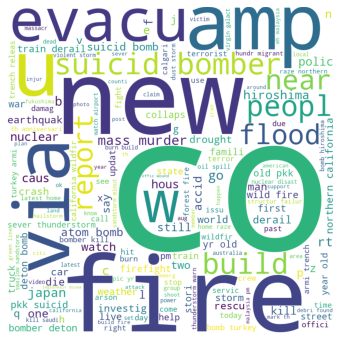

In [35]:
from wordcloud import WordCloud, STOPWORDS
dsstr_words = []
for i, pred in enumerate(y_pred_1):
    if pred == 1:
        [dsstr_words.append(w) for w in corpus1[i].split(' ')] 
        
stopwords = set(STOPWORDS)
dstr_words_string = ''
for word in dsstr_words:
    dstr_words_string += word + ' '
        
wordcloud1 = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(dstr_words_string)
plt.figure(figsize=(10,6))
plt.imshow(wordcloud1)
plt.axis("off")
plt.show()

From above wordcloud we could see some of the words which are contributed to disastrous tweets such as flood, fire, murder, bomber, atom bomb, terrorist, suicid, firefight, war, crash, earthquake etc. 

## Examples of disaster tweet challenges

In [38]:
corpus

['deed reason earthquak may allah forgiv us',
 'forest fire near la rong sask canada',
 'resid ask shelter place notifi offic evacu shelter place order expect',
 'peopl receiv wildfir evacu order california',
 'got sent photo rubi alaska smoke wildfir pour school',
 'rockyfir updat california hwi close direct due lake counti fire cafir wildfir',
 'flood disast heavi rain caus flash flood street manit colorado spring area',
 'top hill see fire wood',
 'emerg evacu happen build across street',
 'afraid tornado come area',
 'three peopl die heat wave far',
 'haha south tampa get flood hah wait second live south tampa gonna gonna fvck flood',
 'rain flood florida tampabay tampa day lost count',
 'flood bago myanmar arriv bago',
 'damag school bu multi car crash break',
 'man',
 'love fruit',
 'summer love',
 'car fast',
 'goooooooaaaaaal',
 'ridicul',
 'london cool',
 'love ski',
 'wonder day',
 'looooool',
 'way eat shit',
 'nyc last week',
 'love girlfriend',
 'cooool',
 'like pasta',
 '

In [63]:
test_indices = np.array(pd.DataFrame(y_test).index)
fn_lines = []
fp_lines = []

for i in range(len(test_indices)):
    if y_pred[i] == 0 and y_test.iloc[i] == 1:
        fn_lines.append(corpus[test_indices[i]])
    if y_pred[i] == 1 and y_test.iloc[i] == 0:
        fp_lines.append(corpus[test_indices[i]])

In [65]:
# false positive lines (wrongly predicted positives though tweet is not disastrous)
fp_lines

['haley lu richardson fight water last survivor review http co oobscfoktq',
 'evacu life',
 'ever seen presid kill wound child man crash sister plane claimin sent god',
 'cameronhigdon drown demon know swim',
 'light stage two load shed stage two load shed forc pm pm http co vxvfaeey q',
 'putin plan destroy western food en mass caus huge public backlash http co fajbxz kar',
 'fascin pic insid north korea propaganda devast peopl live life http co e dbcpwd u',
 'trust iran stop terror like invit arsonist join fire brigad telegraph http co z htdjqzd',
 'defendbutera look like mass murder',
 'pharrel prevent forest fire',
 'flood fish final sunshin amp fab deal albertson anniversari sale lauren paint beauti life http co cwhslmb x',
 'best thing drown call guy angri caus gotten track number http co qyu grorq',
 'firepow lab electron resourc autom fight infecti diseas bioterror http co kvpbybglsr',
 'use exactli nation assembl honestli worthless derail',
 'pakistan suprem court ok militari 

# <font size = 2> Observation: <br>
From above lines we could clearly see many of the lines has web page references starting with http. References summary can contribute to the decision but not the reference lines. Hence we try to remove the word "**http**" from the text lines. 

In [68]:
# false negative lines (predicted No even though it is disastrous tweet)
fn_lines

['come later year man tattoo women novel base real serial killer arkansa amp natur disast nola',
 'russian nuclear biolog chemic nbc brigad emerg respons exercis southern md http co ul xdblmbk http co vjhpvlnbaw',
 'short throw overboard think leader could much wors refuge tonyabbottmhr worst pm ever',
 'cartervil high school coach prepar game day injuri http co kkimmbu',
 'evacid ferguson riot work next time say riot chang anyth fix',
 'violentfeminazi guess ok armenian sinc spent histori get annihil',
 'haydnexist glad save want steal thunder p',
 'like could danger someth',
 'readi get annihil buc game',
 'pam palmat agre perrybellegard get amp vote look devast pmharper caus firstnat idlenomor cndpoli yyj',
 'apollo brown ft p deton http co omfgv w',
 'eeenic true truck caught fire',
 'ohh fukurodani surviv apocalyps bokuto feel horribl poor boy ppor child',
 'servic return normal southlin medic emerg yennora urgent track equip repair cabramatta earlier',
 'chernobyl disast wikipedi

# <font size = 3>Training a model with observed text preprocessing

In [69]:
# removing "http" or "https" and further words
corpus = [s.lstrip('https') for s in corpus]

In [76]:
tfidf1 = TfidfVectorizer() # term-frequency 
X = tfidf1.fit_transform(corpus).toarray()
y = df['target']

In [72]:
rfc1 = RandomForestClassifier()
rfc1.fit(X, y)

RandomForestClassifier()

In [75]:
X.shape

(7613, 19167)

In [77]:
# corpus1 = [s.lstrip('https') for s in corpus1]
X_test1 = tfidf1.transform(corpus1).toarray()
y_pred1 = rfc1.predict(X_test1)

In [78]:
final_sub1 = pd.DataFrame({'id':test_df['id'], 'target':y_pred1})

final_sub.to_csv(r"C:\Users\bhumu\Downloads\nlp_project_dataset\fourth_submission.csv", index = False)